# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1719274624212.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,06/21/2024,5464.62,5466.77,5478.31,5452.03
1,06/20/2024,5473.17,5499.99,5505.53,5455.56
2,06/18/2024,5487.03,5476.15,5490.38,5471.32
3,06/17/2024,5473.23,5431.11,5488.50,5420.40
4,06/14/2024,5431.60,5424.08,5432.39,5403.75
...,...,...,...,...,...
2524,06/30/2014,1960.23,1960.79,1964.24,1958.22
2525,06/27/2014,1960.96,1956.56,1961.47,1952.18
2526,06/26/2014,1957.22,1959.89,1959.89,1944.69
2527,06/25/2014,1959.53,1949.27,1960.83,1947.49


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2529.000000,2529.000000,2529.000000,2529.000000
mean,3153.558209,3142.452918,3159.238509,3124.421475
std,969.131982,991.538035,997.205719,985.834813
min,1829.080000,0.000000,0.000000,0.000000
25%,2213.350000,2210.210000,2214.100000,2202.210000
50%,2881.770000,2883.140000,2894.150000,2866.780000
75%,4063.040000,4053.720000,4081.510000,4032.100000
max,5487.030000,5499.990000,5505.530000,5471.320000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3159.256359,3158.689758,3175.562079,3140.565147
std,968.368874,967.947324,973.500008,962.379057
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2258.010000,2259.997500,2266.610000,2251.585000
50%,2885.645000,2886.700000,2896.610000,2873.305000
75%,4071.647500,4069.035000,4084.122500,4039.052500
max,5487.030000,5499.990000,5505.530000,5471.320000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2528
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

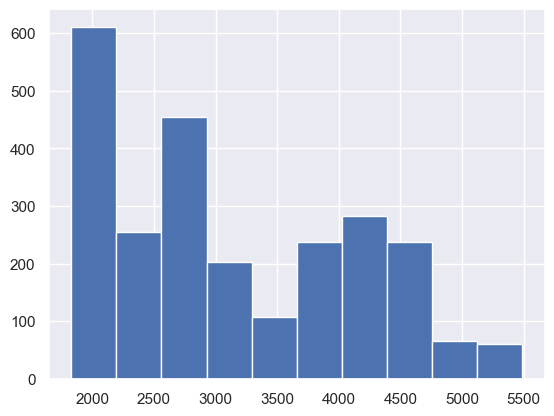

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5464.62

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3159.2563593004816

In [10]:
close_sd = df['Close/Last'].std()
close_sd

968.36887446702

In [11]:
sigma1 = close_mean + close_sd
sigma1

4127.625233767501

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5095.994108234521

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5580.178545468032

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2528
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-06-24 to 2024-06-21')

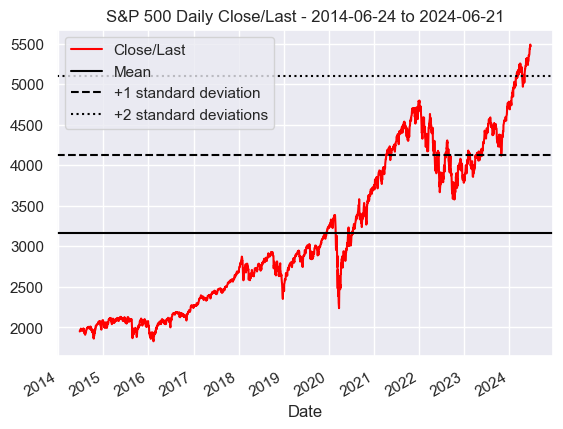

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-06-24 to 2024-06-21')

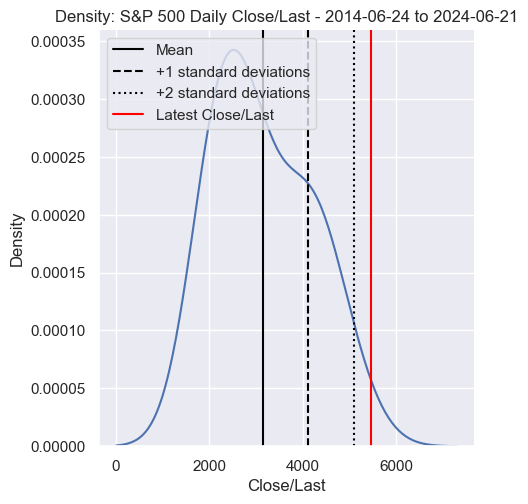

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.3806668114651726

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results